# Part II - Ford GoBike System Data Exploration
## by Emmanuel Jonah

<a id="investigation-overview"></a>

## Investigation Overview

In this investigation, I wanted to look at the characteristics of trips from the San Francisco Ford GoBike System that would give insight to the most appropriate times to make available bikes and their parking spaces to efficiently run the bike program.

<a id="dataset-overview"></a>
## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area from 1st to 28th February 2019. It contains about 183,000 individual trip records. The attributes include: duration, start and end times, start and end stations, membership type and gender and id of the bike used.

In [1]:
# import all packages and set plots to be embedded inline
from datetime import date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe, print statistics
ford_gobike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
ford_gobike_data["start_time"] = pd.to_datetime(ford_gobike_data["start_time"])
ford_gobike_data["end_time"] = pd.to_datetime(ford_gobike_data["end_time"])
ford_gobike_data["start_station_name_min"] = ford_gobike_data["start_station_name"].str.slice(stop=15)

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ford_gobike_data["start_day_name"] = ford_gobike_data["start_time"].dt.day_name()
ford_gobike_data["end_day_name"] = ford_gobike_data["end_time"].dt.day_name()
ford_gobike_data["start_day"] = ford_gobike_data["start_time"].dt.dayofweek
ford_gobike_data["start_day"] = ford_gobike_data["start_day"].replace(np.arange(7), day_names)
ford_gobike_data["start_hour"] = ford_gobike_data["start_time"].dt.hour

current_year = date.today().year
ford_gobike_data["age"] = current_year - ford_gobike_data["member_birth_year"]
# ford_gobike_data[["member_birth_year", "age"]]

gen_cond_list = [ 
    ford_gobike_data["member_birth_year"] < 1901,
    (ford_gobike_data["member_birth_year"] >= 1901) & (ford_gobike_data["member_birth_year"] < 1928),
    (ford_gobike_data["member_birth_year"] >= 1928) & (ford_gobike_data["member_birth_year"] < 1946),
    (ford_gobike_data["member_birth_year"] >= 1946) & (ford_gobike_data["member_birth_year"] < 1966),
    (ford_gobike_data["member_birth_year"] >= 1966) & (ford_gobike_data["member_birth_year"] < 1981),
    (ford_gobike_data["member_birth_year"] >= 1981) & (ford_gobike_data["member_birth_year"] < 1997),
    (ford_gobike_data["member_birth_year"] >= 1997) & (ford_gobike_data["member_birth_year"] < 2013),
    (ford_gobike_data["member_birth_year"] >= 2013) & (ford_gobike_data["member_birth_year"] < current_year)
]
gen_choice_list = [
    "Lost", "Greatest", "Silent", "Baby Boomers", "X", "Y", "Z", "Aplha"
]

ford_gobike_data["social_generation"] = np.select(gen_cond_list, gen_choice_list, "UNKNOWN")
ford_gobike_data = ford_gobike_data.reset_index(drop=True)

In [4]:
def pie_labelling(pct, allvals, is_raw=True):
    absolute = pct / 100.*np.sum(allvals)
    fmt_str = "{:,.0f}\n({:.2f}%)" if is_raw else "{:.2f}%"
    return fmt_str.format(absolute, pct)

<a id="duration-distribution"></a>

## Distribution of Duration of Trip

Trip duration has a long-tailed distribution, with a lot of trip on the low price end, and few on the high price end. When plotted on a log-scale, the trip duration in seconds distribution is unimodal, with the peak between 500 and 1000. There's a steep jump in frequency right from the start and also in descent.

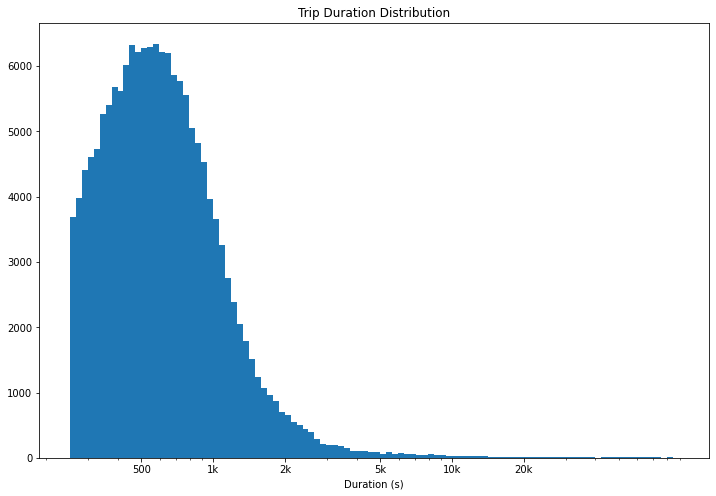

In [5]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(ford_gobike_data['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = ford_gobike_data, x = 'duration_sec', bins = bins)
plt.title("Trip Duration Distribution")
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], ["500", '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration (s)');
# plt.show()

<a id="user-type-distribution"></a>
## Distribution of User Types

Most bike users under this project have subscribed to the project, that is 158,386 persons representing 90.53% of all users.

In [6]:
user_type_grouping = ford_gobike_data["user_type"].value_counts()

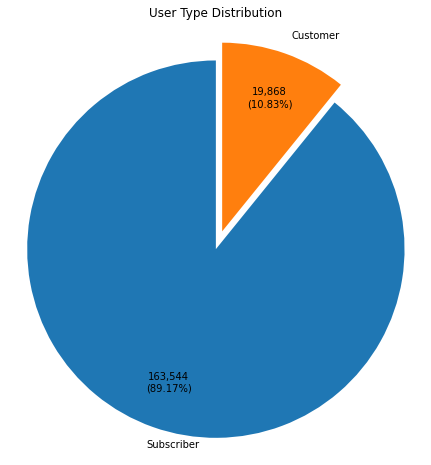

In [7]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
explode = (0, 0.1)

plt.pie(user_type_grouping, labels=user_type_grouping.index, explode=(0, 0.1), 
    autopct=lambda pct: pie_labelling(pct, user_type_grouping, True), 
    startangle=90, center=(0.5,0.5), frame=True, pctdistance=0.75);


plt.title("User Type Distribution")
plt.xticks([]);
plt.yticks([]);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

<a id="social-generations-proportions"></a>
## Social Generation of Bikers

<a id="social-generations-proportions"></a>

From wikipedia, A generation refers to all of the people born and living at about the same time, regarded collectively.[1] It can also be described as, "the average period, generally considered to be about 20–⁠30 years, during which children are born and grow up, become adults, and begin to have children. https://en.wikipedia.org/wiki/Generation#List_of_social_generations

This categorization of the data would give insight to which social group patronize the bike services. This maybe skewed to the generation which has the most number of persons alive with the timeframe the data was recorded.

It was noted that Generation Y, that is persons born between 1981 and 1996 patronize the bike services more that all other generations.

In [8]:
social_generation_prop = ford_gobike_data["social_generation"].groupby(ford_gobike_data["social_generation"]).count() / ford_gobike_data.shape[0]
social_generation_prop = social_generation_prop.reindex(gen_choice_list)
# social_generation_prop

posx and posy should be finite values
posx and posy should be finite values


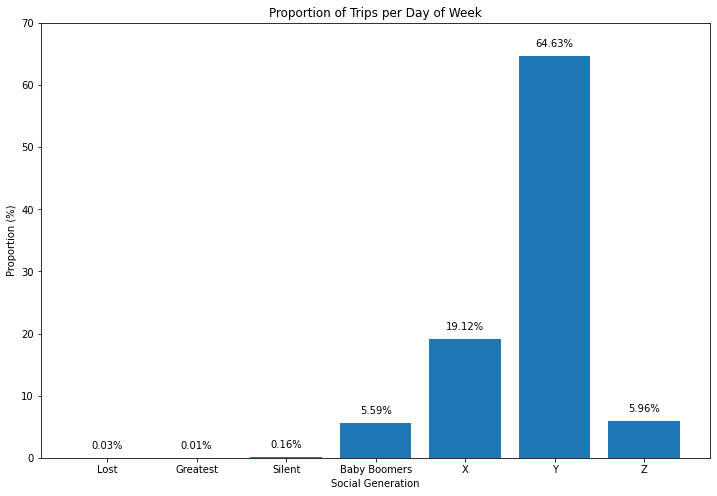

In [9]:
fig, ax = plt.subplots(figsize=[12, 8])
plt.bar(data=social_generation_prop, x=gen_choice_list, height=social_generation_prop)
plt.title("Proportion of Trips per Day of Week")
plt.xlabel("Social Generation")
plt.ylabel("Proportion (%)")

ax.set_yticks(np.arange(0, 0.8, 0.1), labels=[ str(x) for x in np.arange(0, 80, 10) ])

# loop through each pair of locations and labels
count = 0
for label in social_generation_prop.index:
    # get the text property for the label to get the correct count
    pct_string = '{:0.2f}%'.format(100*social_generation_prop.loc[label])
    plt.text(count, social_generation_prop.loc[label] + 0.015, pct_string, ha = 'center', color = 'black');
    count += 1

<a id="day-of-week-by-social-generation"></a>
## Relationship between Day of Week and Social Generation

It was deduced that:
* Only the Baby Boomers, X and Y social generations have their data conforming to the main trend of trips by day of week (that is maximum number of trips on Thurday with both Saturday and Sunday having the least and almost of the same level).
* The Greatest generation does not make trips on weekends.
* The Silent generation is more active on Mondays as compared to the rest of the days of the week.
* For the Z generation, they are active throughout the week with their numbers ranging between 1250 and 2000 trips for each day of the week.
* There is no data for the Alpha generation as such the chart is empty.

In [10]:
ford_gobike_data[ford_gobike_data["social_generation"] == "Alpha"].shape

(0, 23)

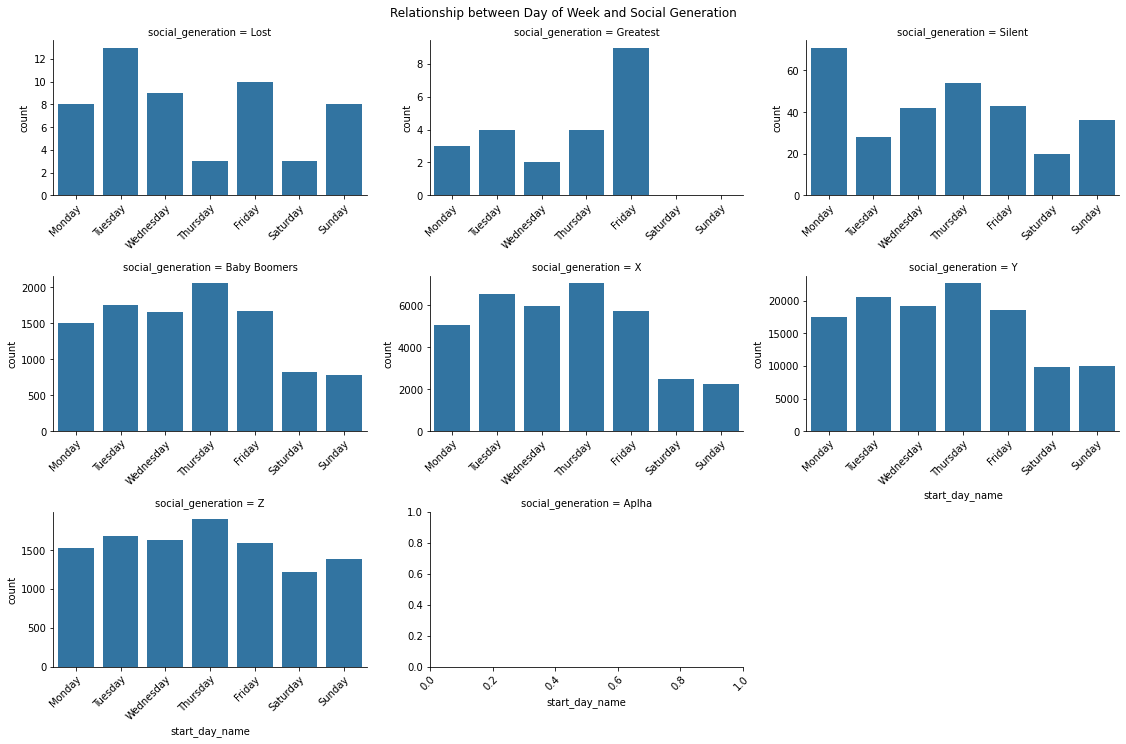

In [52]:
fg = sns.FacetGrid(data=ford_gobike_data, col="social_generation", col_wrap=3, sharex=False, sharey=False, col_order=gen_choice_list, margin_titles=True, height=3.5, aspect=1.5)
fg.map_dataframe(sns.countplot, x="start_day_name", order=day_names)
plt.subplots_adjust(top=0.9)
fg.fig.suptitle("Relationship between Day of Week and Social Generation")
for ax in fg.axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor");
fg.tight_layout()

<a id="top-5-start-stations-day-trend"></a>
## Relationship between Day of Week and Top 5 Start Stations

For weekends:
* trips pick-up after 7 AM

All weekdays have similar charts were:
* the number of trips pick up from 5 AM  
* the maximum number of trips start at 8-9 AM and 5 PM

This weekend pattern mimics office work hours were workers are to reach their offices by 8-9 AM and leave by 4-5 PM. This might mean most riders often use this as a mode of transportation to and from work on weekdays.



In [12]:
top_5_start_stations_min = ford_gobike_data["start_station_name"].value_counts().head(5)
top_5_start_stations_min = top_5_start_stations_min.index.str.slice(stop=15).to_numpy()
top_5_start_stations_min

array(['Market St at 10', 'San Francisco C', 'Berry St at 4th',
       'Montgomery St B', 'Powell St BART '], dtype=object)

In [13]:
top_5_start_stations_df = ford_gobike_data[ford_gobike_data["start_station_name_min"].isin(top_5_start_stations_min)]
top_5_start_stations_df["start_station_name_min"] = top_5_start_stations_df["start_station_name_min"].str.slice(stop=15)
# top_5_start_stations_df

In [14]:
day_of_week_count = top_5_start_stations_df.groupby(["start_station_name_min", "start_day"])["bike_id"].count()
# day_of_week_count

In [15]:
time_df = top_5_start_stations_df.groupby(["start_station_name_min", "start_day", "start_hour"]).count()["bike_id"]
# time_df

In [16]:
t = pd.DataFrame(time_df).reset_index()
t = t.rename(columns={"bike_id": "tally"})
t

,start_station_name_min,start_day,start_hour,tally
0,Berry St at 4th,Friday,0,1
1,Berry St at 4th,Friday,1,1
2,Berry St at 4th,Friday,2,2
3,Berry St at 4th,Friday,6,17
4,Berry St at 4th,Friday,7,18
...,...,...,...,...
685,San Francisco C,Wednesday,19,83
686,San Francisco C,Wednesday,20,29
687,San Francisco C,Wednesday,21,15
688,San Francisco C,Wednesday,22,15


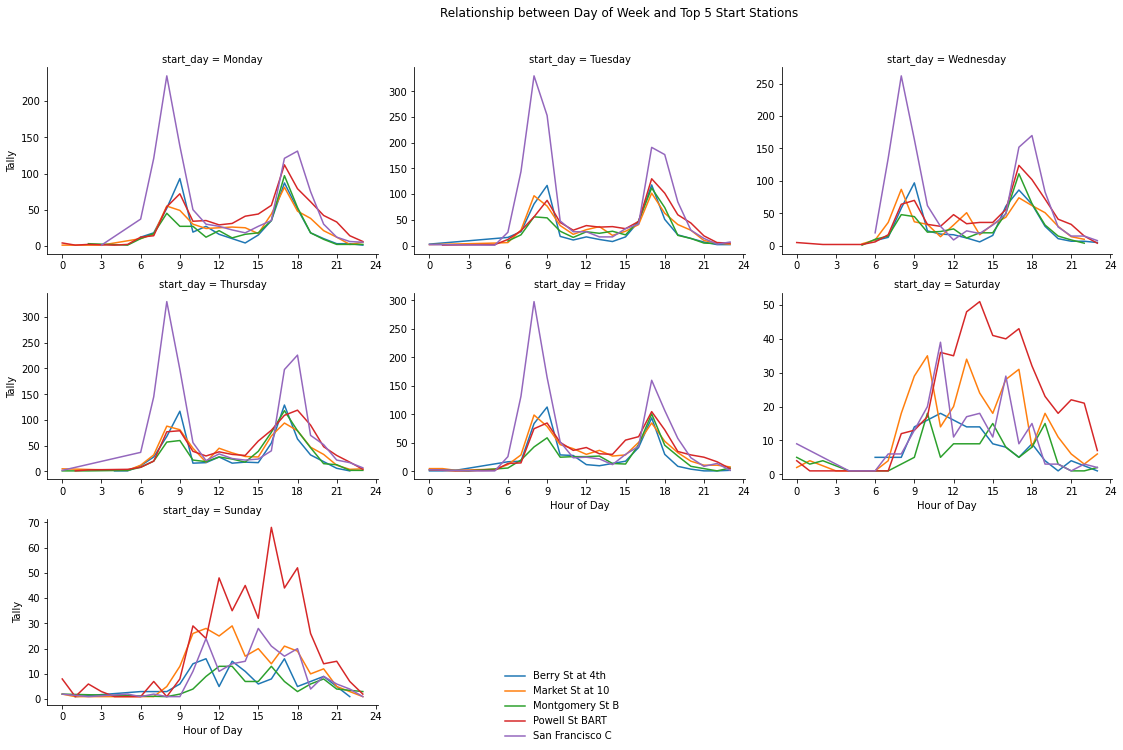

In [51]:
fg = sns.FacetGrid(data=t, col="start_day", margin_titles=True, col_wrap=3, col_order=day_names, height=3.5, aspect=1.5, sharex=False, sharey=False)
fg.map_dataframe(sns.lineplot, x="start_hour", y="tally", hue="start_station_name_min")
fg.set_axis_labels("Hour of Day", "Tally")
fg.add_legend(loc=8)
fg.set(xticks=np.arange(0, 25, 3));
plt.subplots_adjust(top=0.9)
fg.fig.suptitle("Relationship between Day of Week and Top 5 Start Stations");

In [18]:
# !jupyter nbconvert Ford_GoBike_System_Part2.ipynb --to slides --post serve --no-input --no-prompt